In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math 
from sklearn.metrics import mean_squared_error

sns.set()
%matplotlib inline

In [132]:
df = pd.read_csv('/Users/simonpastrana/Desktop/BABSON MSBA/SPRING SEMESTER/ADVANCE PROGRAMMING/GROUP WORK/Housing data homework.csv')

In [133]:
df.head()

,Date,Value
0,1,202225
1,2,203846
2,3,205338
3,4,208403
4,5,211332


In [134]:
df.shape

(276, 2)

In [135]:
df.isnull().values.any()

False

In [174]:
df.describe()

,Date,Value
count,276.000000,276.000000
mean,138.500000,460752.630435
std,79.818544,122057.934212
min,1.000000,202225.000000
25%,69.750000,408624.500000
50%,138.500000,470453.000000
75%,207.250000,586972.750000
max,276.000000,644175.000000


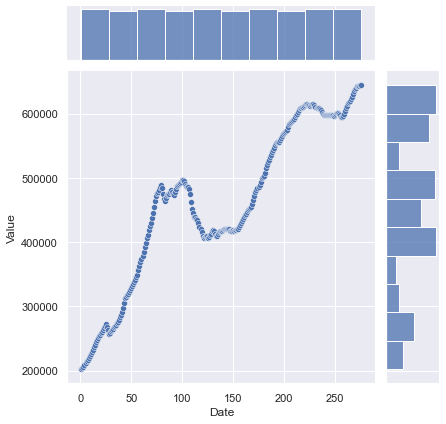

In [137]:
sns.jointplot(x='Date', y='Value',data=df)

<AxesSubplot:xlabel='Date', ylabel='Value'>

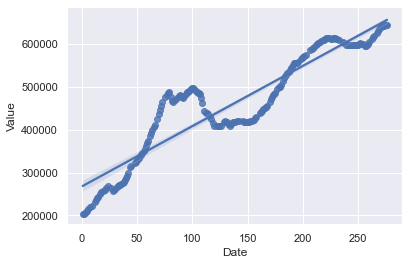

In [175]:
sns.regplot(x='Date', # Horizontal axis
           y='Value', # Vertical axis
           data=df_copy)

In [138]:
N = df.shape[0]

In [139]:
training_size = int(N*0.8)

In [140]:
df_train, df_test = train_test_split(df, train_size=training_size, random_state=0)

In [141]:
Date_train = df_train.iloc[:, :-1]
Value_train = df_train.iloc[:, -1]

In [153]:
Date_test = df_test.iloc[:, :-1]
Value_test = df_test.iloc[:, -1]

In [154]:
model = LinearRegression().fit(Date_train, Value_train)

In [155]:
predictions = model.predict(Date_test)
print(predictions)

[524540.31433978 286994.0803869  343218.0410858  369924.42241779
 530162.71040967 559680.2897766  395225.20473229 579358.67602122
 441609.97230889 532973.90844462 428959.58115164 572330.68093386
 608876.25538815 407875.59588955 531568.30942715 296833.2735092
 348840.4371557  485183.54185055 645421.82984244 277154.88726459
 354462.83322559 479561.14578066 538596.30451451 547029.89861935
 282777.28333448 509078.72514758 391008.40767988 437393.17525648
 275749.28824711 568113.88388144 575141.8789688  417714.78901186
 379763.61554009 632771.43868518 597631.46324836 414903.59097691
 443015.57132637 329162.05091108 468316.35364088 596225.86423089
 634177.03770265 556869.09174166 565302.68584649 392414.00669735
 554057.89370671 603253.85931825 629960.24065024 419120.38802933
 303861.26859657 431770.77918658 516106.72023495 528757.1113922
 580764.27503869 317917.2587713  355868.43224306 482372.3438156 ]


In [162]:
errors= Value_test-predictions

In [163]:
errors_squared= errors**2

In [165]:
mse=errors_squared.mean()
print(mse)

1907453918.446327


In [167]:
rmse = np.sqrt(mse)
print ('On average, our predictions with the model were off by:', rmse, 'dollars')

Our predictions in average were off by: 43674.40804918055 dollars


In [168]:
ape=(abs(errors/Value_test))

In [171]:
mape=ape.mean()
print('On average, our predictions with the model were off by:', mape)

On average, our predictions were off by: 0.08661622162455548


In [208]:
predictions_bench = Value_train.mean()

In [213]:
errors_bench= Value_test - predictions_bench

In [214]:
errors_bench_squared= (errors_bench**2)

In [215]:
mse_bench= errors_bench_squared.mean()

In [220]:
rmse_bench= np.sqrt(mse_bench)
print('Our predictions without the model would be off by:', rmse_bench, 'dollars')

Our predictions without the model would be off by: 120799.50822335886 dollars


In [217]:
ape_bench=(abs(errors_bench/Value_test))

In [219]:
mape_bench= ape_bench.mean()
print('Oue predictions without the model would be off by: ', mape_bench)

Oue predictions without the model would be off by:  0.24948447025855622 dollars
